In [524]:
import pandas as pd
import numpy as np

In [525]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


통합된 데이터의 csv 파일 불러오기

In [526]:
matches = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Football Prediction/fixed data.csv", index_col=0)
matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Div,,,,,,,,,,,,,,,,,,
1,08/08/2015,Bournemouth,Aston Villa,0,1,A,11,7,2,3,13,13,6,3,3,4,0,0
2,08/08/2015,Chelsea,Swansea,2,2,D,11,18,3,10,15,16,4,8,1,3,1,0
3,08/08/2015,Everton,Watford,2,2,D,10,11,5,5,7,13,8,2,1,2,0,0
4,08/08/2015,Leicester,Sunderland,4,2,H,19,10,8,5,13,17,6,3,2,4,0,0
5,08/08/2015,Man United,Tottenham,1,0,H,9,9,1,4,12,12,1,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,29/10/2023,West Ham,Everton,0,1,A,12,10,2,4,7,11,4,3,4,1,0,0
3137,29/10/2023,Aston Villa,Luton,3,1,H,17,7,6,1,11,10,6,4,3,2,0,0
3138,29/10/2023,Brighton,Fulham,1,1,D,18,10,7,5,12,8,7,3,0,3,0,0


각 Column의 dtypes

In [527]:
matches.dtypes

Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

Date : object -> datitime64

In [528]:
matches["Date"] = pd.to_datetime(matches["Date"], format='%d/%m/%Y')

In [529]:
matches.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
dtype: object

In [530]:
matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
Div,,,,,,,,,,,,,,,,,,
1,2015-08-08,Bournemouth,Aston Villa,0,1,A,11,7,2,3,13,13,6,3,3,4,0,0
2,2015-08-08,Chelsea,Swansea,2,2,D,11,18,3,10,15,16,4,8,1,3,1,0
3,2015-08-08,Everton,Watford,2,2,D,10,11,5,5,7,13,8,2,1,2,0,0
4,2015-08-08,Leicester,Sunderland,4,2,H,19,10,8,5,13,17,6,3,2,4,0,0
5,2015-08-08,Man United,Tottenham,1,0,H,9,9,1,4,12,12,1,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,2023-10-29,West Ham,Everton,0,1,A,12,10,2,4,7,11,4,3,4,1,0,0
3137,2023-10-29,Aston Villa,Luton,3,1,H,17,7,6,1,11,10,6,4,3,2,0,0
3138,2023-10-29,Brighton,Fulham,1,1,D,18,10,7,5,12,8,7,3,0,3,0,0


In [531]:
unique_teams = pd.concat([matches["HomeTeam"], matches["AwayTeam"]]).unique()

In [532]:
unique_teams

array(['Bournemouth', 'Chelsea', 'Everton', 'Leicester', 'Man United',
       'Norwich', 'Arsenal', 'Newcastle', 'Stoke', 'West Brom',
       'Aston Villa', 'Southampton', 'Sunderland', 'Swansea', 'Tottenham',
       'Watford', 'West Ham', 'Crystal Palace', 'Man City', 'Liverpool',
       'Burnley', 'Hull', 'Middlesbrough', 'Brighton', 'Huddersfield',
       'Fulham', 'Wolves', 'Cardiff', 'Sheffield United', 'Leeds',
       'Brentford', "Nott'm Forest", 'Luton'], dtype=object)

In [533]:
team_to_code = {team: code for code, team in enumerate(unique_teams)}
for team, code in team_to_code.items():
    print(f"{team}: {code}")

Bournemouth: 0
Chelsea: 1
Everton: 2
Leicester: 3
Man United: 4
Norwich: 5
Arsenal: 6
Newcastle: 7
Stoke: 8
West Brom: 9
Aston Villa: 10
Southampton: 11
Sunderland: 12
Swansea: 13
Tottenham: 14
Watford: 15
West Ham: 16
Crystal Palace: 17
Man City: 18
Liverpool: 19
Burnley: 20
Hull: 21
Middlesbrough: 22
Brighton: 23
Huddersfield: 24
Fulham: 25
Wolves: 26
Cardiff: 27
Sheffield United: 28
Leeds: 29
Brentford: 30
Nott'm Forest: 31
Luton: 32


In [534]:
matches["HomeTeam code"] = matches["HomeTeam"].map(team_to_code)
matches["AwayTeam code"] = matches["AwayTeam"].map(team_to_code)

In [535]:
matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeTeam code,AwayTeam code
Div,,,,,,,,,,,,,,,,,,,,
1,2015-08-08,Bournemouth,Aston Villa,0,1,A,11,7,2,3,13,13,6,3,3,4,0,0,0,10
2,2015-08-08,Chelsea,Swansea,2,2,D,11,18,3,10,15,16,4,8,1,3,1,0,1,13
3,2015-08-08,Everton,Watford,2,2,D,10,11,5,5,7,13,8,2,1,2,0,0,2,15
4,2015-08-08,Leicester,Sunderland,4,2,H,19,10,8,5,13,17,6,3,2,4,0,0,3,12
5,2015-08-08,Man United,Tottenham,1,0,H,9,9,1,4,12,12,1,2,2,3,0,0,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,2023-10-29,West Ham,Everton,0,1,A,12,10,2,4,7,11,4,3,4,1,0,0,16,2
3137,2023-10-29,Aston Villa,Luton,3,1,H,17,7,6,1,11,10,6,4,3,2,0,0,10,32
3138,2023-10-29,Brighton,Fulham,1,1,D,18,10,7,5,12,8,7,3,0,3,0,0,23,25


In [536]:
# HomeTeam이 승리 -> FTR = H -> HomeWin 열에 1
matches['HomeWin'] = matches['FTR'].apply(lambda x: 1 if x == 'H' else 0)

# AwayTeam이 승리 -> FTR = A -> AwayWin 열에 1
matches['AwayWin'] = matches['FTR'].apply(lambda x: 1 if x == 'A' else 0)

# 무승부 -> FTR = D -> Draw 열에 1
matches['Draw'] = matches['FTR'].apply(lambda x: 1 if x == 'D' else 0)

In [537]:
matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,...,AC,HY,AY,HR,AR,HomeTeam code,AwayTeam code,HomeWin,AwayWin,Draw
Div,,,,,,,,,,,,,,,,,,,,,
1,2015-08-08,Bournemouth,Aston Villa,0,1,A,11,7,2,3,...,3,3,4,0,0,0,10,0,1,0
2,2015-08-08,Chelsea,Swansea,2,2,D,11,18,3,10,...,8,1,3,1,0,1,13,0,0,1
3,2015-08-08,Everton,Watford,2,2,D,10,11,5,5,...,2,1,2,0,0,2,15,0,0,1
4,2015-08-08,Leicester,Sunderland,4,2,H,19,10,8,5,...,3,2,4,0,0,3,12,1,0,0
5,2015-08-08,Man United,Tottenham,1,0,H,9,9,1,4,...,2,2,3,0,0,4,14,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,2023-10-29,West Ham,Everton,0,1,A,12,10,2,4,...,3,4,1,0,0,16,2,0,1,0
3137,2023-10-29,Aston Villa,Luton,3,1,H,17,7,6,1,...,4,3,2,0,0,10,32,1,0,0
3138,2023-10-29,Brighton,Fulham,1,1,D,18,10,7,5,...,3,0,3,0,0,23,25,0,0,1


In [538]:
selected_columns = ["Date", "HomeTeam code", "AwayTeam code", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR", "HomeWin", "AwayWin", "Draw"]
data = matches[selected_columns]

# HomeTeam code 와 관련된 변수로 다시 생성
home_team_features = ["HS", "HST", "HF", "HC", "HY", "HR"]
for feature in home_team_features:
    data[f"Home_{feature}"] = data[feature]

# AwayTeam code 와 관련된 변수로 다시 생성
away_team_features = ["AS", "AST", "AF", "AC", "AY", "AR"]
for feature in away_team_features:
    data[f"Away_{feature}"] = data[feature]

# 새로운 데이터프레임 생성 matches -> new_matches
new_columns = ["Date", "HomeTeam code", "AwayTeam code", "HomeWin", "AwayWin", "Draw"]
for feature in home_team_features:
    new_columns.append(f"Home_{feature}")
for feature in away_team_features:
    new_columns.append(f"Away_{feature}")

new_matches = data[new_columns]

<ipython-input-538-46d427e9fc47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"Home_{feature}"] = data[feature]
<ipython-input-538-46d427e9fc47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"Home_{feature}"] = data[feature]
<ipython-input-538-46d427e9fc47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [539]:
new_matches

,Date,HomeTeam code,AwayTeam code,HomeWin,AwayWin,Draw,Home_HS,Home_HST,Home_HF,Home_HC,Home_HY,Home_HR,Away_AS,Away_AST,Away_AF,Away_AC,Away_AY,Away_AR
Div,,,,,,,,,,,,,,,,,,
1,2015-08-08,0,10,0,1,0,11,2,13,6,3,0,7,3,13,3,4,0
2,2015-08-08,1,13,0,0,1,11,3,15,4,1,1,18,10,16,8,3,0
3,2015-08-08,2,15,0,0,1,10,5,7,8,1,0,11,5,13,2,2,0
4,2015-08-08,3,12,1,0,0,19,8,13,6,2,0,10,5,17,3,4,0
5,2015-08-08,4,14,1,0,0,9,1,12,1,2,0,9,4,12,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,2023-10-29,16,2,0,1,0,12,2,7,4,4,0,10,4,11,3,1,0
3137,2023-10-29,10,32,1,0,0,17,6,11,6,3,0,7,1,10,4,2,0
3138,2023-10-29,23,25,0,0,1,18,7,12,7,0,0,10,5,8,3,3,0


In [540]:
import pandas as pd

home_team_codes = new_matches['HomeTeam code']
away_team_codes = new_matches['AwayTeam code']

new_matches['HomeTeam code'] = home_team_codes.astype('category')
new_matches['AwayTeam code'] = away_team_codes.astype('category')

<ipython-input-540-b4b51504189c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches['HomeTeam code'] = home_team_codes.astype('category')
<ipython-input-540-b4b51504189c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches['AwayTeam code'] = away_team_codes.astype('category')


In [541]:
new_matches.dtypes

Date             datetime64[ns]
HomeTeam code          category
AwayTeam code          category
HomeWin                   int64
AwayWin                   int64
Draw                      int64
Home_HS                   int64
Home_HST                  int64
Home_HF                   int64
Home_HC                   int64
Home_HY                   int64
Home_HR                   int64
Away_AS                   int64
Away_AST                  int64
Away_AF                   int64
Away_AC                   int64
Away_AY                   int64
Away_AR                   int64
dtype: object

In [542]:
print(new_matches.columns)

Index(['Date', 'HomeTeam code', 'AwayTeam code', 'HomeWin', 'AwayWin', 'Draw',
       'Home_HS', 'Home_HST', 'Home_HF', 'Home_HC', 'Home_HY', 'Home_HR',
       'Away_AS', 'Away_AST', 'Away_AF', 'Away_AC', 'Away_AY', 'Away_AR'],
      dtype='object')


In [544]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# new_matches 데이터프레임에서 필요한 열 선택
selected_columns = ["HomeTeam code", "AwayTeam code", "Home_HS", "Home_HST", "Home_HF", "Home_HC", "Home_HY", "Home_HR", "Away_AS", "Away_AST", "Away_AF", "Away_AC", "Away_AY", "Away_AR", "HomeWin", "AwayWin", "Draw"]
data = new_matches[selected_columns]

# X값과 y값
X = data[["HomeTeam code", "AwayTeam code", "Home_HST", "Home_HC", "Home_HR", "Away_AST", "Away_AC", "Away_AR"]]
y = data[["HomeWin", "AwayWin", "Draw"]]

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 모델 생성
model1 = keras.Sequential()
model1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(3, activation='softmax'))

# 모델 컴파일
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history1 = model1.fit(X_train, y_train, epochs=16, batch_size=32, validation_split=0.2, verbose=1)

# 모델 평가
loss1, accuracy1 = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy for Model 1: {accuracy1:.2f}")

# Model 1의 예측 결과
predictions1 = model1.predict(X_test)

Epoch 1/16
63/63 [==============================] - 3s 21ms/step - loss: 1.1242 - accuracy: 0.4102 - val_loss: 0.9720 - val_accuracy: 0.5706
Epoch 2/16
63/63 [==============================] - 0s 4ms/step - loss: 1.0068 - accuracy: 0.5132 - val_loss: 0.9183 - val_accuracy: 0.5885
Epoch 3/16
63/63 [==============================] - 0s 3ms/step - loss: 0.9742 - accuracy: 0.5515 - val_loss: 0.8927 - val_accuracy: 0.5964
Epoch 4/16
63/63 [==============================] - 0s 4ms/step - loss: 0.9481 - accuracy: 0.5729 - val_loss: 0.8794 - val_accuracy: 0.5984
Epoch 5/16
63/63 [==============================] - 0s 4ms/step - loss: 0.9236 - accuracy: 0.5724 - val_loss: 0.8602 - val_accuracy: 0.6064
Epoch 6/16
63/63 [==============================] - 0s 3ms/step - loss: 0.9195 - accuracy: 0.5754 - val_loss: 0.8573 - val_accuracy: 0.6044
Epoch 7/16
63/63 [==============================] - 0s 3ms/step - loss: 0.9124 - accuracy: 0.5898 - val_loss: 0.8560 - val_accuracy: 0.6024
Epoch 8/16
63/63 [=

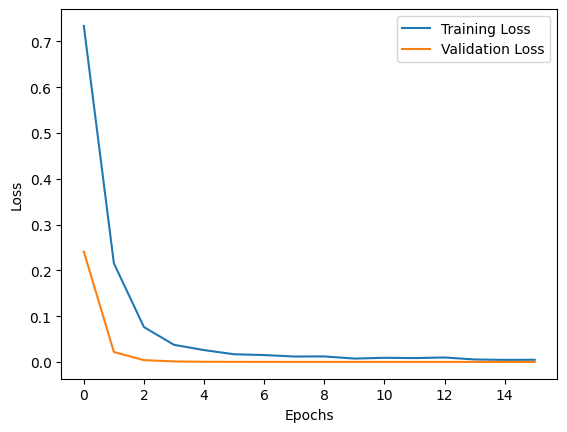

In [502]:
import matplotlib.pyplot as plt

# 손실 그래프
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

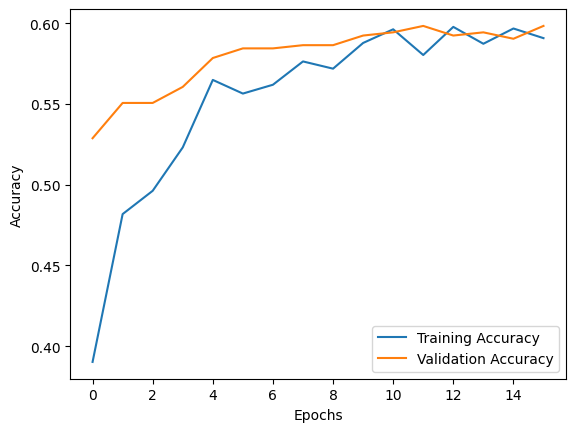

In [484]:
# accuracy 그래프
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [545]:
model1.save("model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [546]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import numpy as np

# 모델 1 불러오기
model1 = load_model("model1.h5")

# 모델 2의 입력 크기 변경
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(2,)))  # 입력 크기를 2로 변경 (HomeTeam code, AwayTeam code)
model2.add(Dense(32, activation='relu'))
model2.add(Dense(3, activation='softmax'))  # 출력 노드 수를 3으로 변경 (HomeWin, AwayWin, Draw)

# 모델 2 컴파일
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 2를 사용하여 예측 수행
# (가상의 경기 정보, Hometeam code와 Awayteam code만 포함)
future_match = np.array([[30, 16]])  # 예측하려는 경기의 HomeTeam code와 AwayTeam code
predictions = model2.predict(future_match)

# 예측값 출력
print("Predictions for the future match:")
print(f"HomeWin: {predictions[0][0]:.2f}")
print(f"AwayWin: {predictions[0][1]:.2f}")
print(f"Draw: {predictions[0][2]:.2f}")

1/1 [==============================] - 0s 65ms/step
Predictions for the future match:
HomeWin: 0.00
AwayWin: 1.00
Draw: 0.00


In [547]:
model2.save("model2.h5")

In [548]:
schedule_table = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Football Prediction/Schedule Table.csv", index_col=0)
schedule_table

,Date,HomeTeam code,AwayTeam code
Div,,,
3141,2023-11-04,25,4
3142,2023-11-05,30,16
3143,2023-11-05,20,17
3144,2023-11-05,2,23
3145,2023-11-05,18,0
...,...,...,...
3416,2024-05-20,17,10
3417,2024-05-20,19,26
3418,2024-05-20,32,25


In [549]:
import numpy as np
import pandas as pd
from keras.models import load_model

# 모델 2 불러오기
model2 = load_model("model2.h5")

# 예측 결과 및 확률 저장할 열 초기화
schedule_table['HomeWinProb'] = 0.0
schedule_table['AwayWinProb'] = 0.0
schedule_table['DrawProb'] = 0.0
schedule_table['Result'] = ""

for index, row in schedule_table.iterrows():
    home_team_code = row['HomeTeam code']
    away_team_code = row['AwayTeam code']

    # 모델 2를 사용하여 예측 수행
    future_match = np.array([[home_team_code, away_team_code]])
    predictions2 = model2.predict(future_match)

    # 확률값을 저장
    home_win_prob = predictions2[0][0]
    away_win_prob = predictions2[0][1]
    draw_prob = predictions2[0][2]

    # 확률 열에 저장
    schedule_table.at[index, 'HomeWinProb'] = home_win_prob
    schedule_table.at[index, 'AwayWinProb'] = away_win_prob
    schedule_table.at[index, 'DrawProb'] = draw_prob

    # 확률을 기반으로 확정 결과 계산
    result = np.argmax(predictions2, axis=1)
    if result == 0:
        schedule_table.at[index, 'Result'] = "H"
    elif result == 1:
        schedule_table.at[index, 'Result'] = "A"
    else:
        schedule_table.at[index, 'Result'] = "D"

1/1 [==============================] - 0s 22ms/step


In [550]:
schedule_table

,Date,HomeTeam code,AwayTeam code,HomeWinProb,AwayWinProb,DrawProb,Result
Div,,,,,,,
3141,2023-11-04,25,4,1.187066e-03,0.992981,0.005832,A
3142,2023-11-05,30,16,4.934238e-06,0.999808,0.000188,A
3143,2023-11-05,20,17,3.332162e-05,0.999294,0.000673,A
3144,2023-11-05,2,23,3.856114e-04,0.997093,0.002522,A
3145,2023-11-05,18,0,1.719855e-02,0.943271,0.039530,A
...,...,...,...,...,...,...,...
3416,2024-05-20,17,10,7.178683e-04,0.993186,0.006096,A
3417,2024-05-20,19,26,2.353569e-06,0.999892,0.000105,A
3418,2024-05-20,32,25,1.520075e-07,0.999986,0.000014,A


In [554]:
import pandas as pd

teams = list(set(schedule_table['HomeTeam code']).union(set(schedule_table['AwayTeam code'])))

team_points = {team_code: 0 for team_code in teams}

for _, row in schedule_table.iterrows():
    home_team = row['HomeTeam code']
    away_team = row['AwayTeam code']
    result = row['Result']

    if result == 'H':
        team_points[home_team] += 3
    elif result == 'A':
        team_points[away_team] += 3
    elif result == 'D':
        team_points[home_team] += 1
        team_points[away_team] += 1

# 승점을 새로운 데이터프레임 winning_points 에 저장
winning_points_df = pd.DataFrame({'Team Code': teams, 'Winning Point': [team_points[team] for team in teams]})

print(winning_points_df)

    Team Code  Winning Point
0           0             42
1           1             45
2           2             42
3           4             45
4           6             45
5           7             42
6          10             42
7          14             39
8          16             42
9          17             42
10         18             39
11         19             42
12         20             42
13         23             45
14         25             39
15         26             42
16         28             45
17         30             42
18         31             39
19         32             39
